# Predicción de Resultados - Liga MX

Este notebook analiza datos históricos de la Liga MX para predecir el resultado del partido (local gana, empata o pierde), usando modelos de clasificación.

In [ ]:
#Carga de librerías

import pandas as pd #manejo de datos y cálculos numéricos.
import numpy as np
#visualizaciones
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split #separa los datos en entrenamiento y prueba.
from sklearn.linear_model import LogisticRegression #modelo de predicción para clasificar resultados.
from sklearn.metrics import confusion_matrix, classification_report #métricas de evaluación.
from sklearn.preprocessing import LabelEncoder #codifica las etiquetas de clase en valores numéricos.

%matplotlib inline


In [ ]:
#Carga del dataset
df = pd.read_csv('/content/Liga_MX.csv')
df.head()


,Country,League,Season,Date,Time,Home,Away,HG,AG,Res
0,Mexico,Liga MX,2012/2013,21/07/2012,01:30,Chiapas,Tigres,0,4,A
1,Mexico,Liga MX,2012/2013,21/07/2012,03:30,Tijuana,Puebla,2,0,H
2,Mexico,Liga MX,2012/2013,21/07/2012,23:00,Cruz Azul,Monarcas,0,0,D
3,Mexico,Liga MX,2012/2013,21/07/2012,23:00,Queretaro,León,0,2,A
4,Mexico,Liga MX,2012/2013,22/07/2012,01:00,Monterrey,América,0,0,D


In [ ]:
#Exploración inicial
df.info() #Muestra tipos de datos y valores no nulos
df.describe() #estadísticas básicas (mínimo, máximo, media…).
df.isnull().sum() #detecta valores faltantes en cada columna.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  4345 non-null   object
 1   League   4345 non-null   object
 2   Season   4345 non-null   object
 3   Date     4345 non-null   object
 4   Time     4345 non-null   object
 5   Home     4345 non-null   object
 6   Away     4345 non-null   object
 7   HG       4345 non-null   int64 
 8   AG       4345 non-null   int64 
 9   Res      4345 non-null   object
dtypes: int64(2), object(8)
memory usage: 339.6+ KB


,0
Country,0
League,0
Season,0
Date,0
Time,0
Home,0
Away,0
HG,0
AG,0
Res,0


In [ ]:
df.rename(columns={
    'Home': 'Equipo_Local',
    'Away': 'Equipo_Visitante',
    'HG': 'Goles_Local',
    'AG': 'Goles_Visitante',
    'Res': 'Resultado'
}, inplace=True)

df = df[['Date', 'Season', 'Equipo_Local', 'Equipo_Visitante', 'Goles_Local', 'Goles_Visitante', 'Resultado']]
df.head()


,Date,Season,Equipo_Local,Equipo_Visitante,Goles_Local,Goles_Visitante,Resultado
0,21/07/2012,2012/2013,Chiapas,Tigres,0,4,A
1,21/07/2012,2012/2013,Tijuana,Puebla,2,0,H
2,21/07/2012,2012/2013,Cruz Azul,Monarcas,0,0,D
3,21/07/2012,2012/2013,Queretaro,León,0,2,A
4,22/07/2012,2012/2013,Monterrey,América,0,0,D


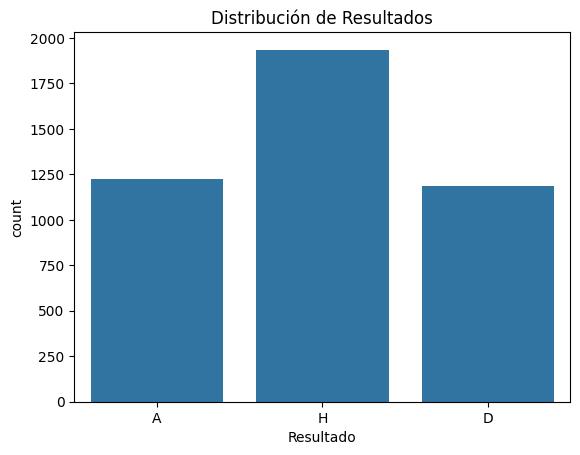

In [ ]:
# Visualización rápida de distribución de resultados
sns.countplot(x='Resultado', data=df)
plt.title('Distribución de Resultados')
plt.show()


In [ ]:
#Preparación de datos
# Convierte los nombres de equipos y resultados a valores numéricos para que el modelo los pueda usar.

label_encoder = LabelEncoder()
df["Home_enc"] = label_encoder.fit_transform(df["Equipo_Local"])
df["Away_enc"] = label_encoder.fit_transform(df["Equipo_Visitante"])
df["Res_enc"] = label_encoder.fit_transform(df["Resultado"])

In [ ]:
#Selección de variables
X = df[["Home_enc", "Away_enc"]] #características (equipos local y visitante codificados).
y = df["Res_enc"] #variable objetivo (resultado codificado).


In [ ]:
df['Diferencia_Goles'] = df['Goles_Local'] - df['Goles_Visitante']
X = df[['Diferencia_Goles']]
y = df['Resultado']


In [ ]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # H = 0, D = 1, A = 2
le.classes_


array(['A', 'D', 'H'], dtype=object)

In [ ]:
#División en entrenamiento y prueba
#Divide los datos: 80% para entrenar, 20% para probar.
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [ ]:
#Entrenamiento del modelo
#Crea un modelo de regresión logística y lo entrena con los datos.
modelo = LogisticRegression(multi_class='multinomial', max_iter=200)
modelo.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=200, multi_class='multinomial')

In [ ]:
#Predicciones
#Usa el modelo entrenado para predecir el resultado de los partidos del conjunto de prueba.
y_pred = modelo.predict(X_test)

              precision    recall  f1-score   support

           A       1.00      1.00      1.00       256
           D       1.00      1.00      1.00       247
           H       1.00      1.00      1.00       366

    accuracy                           1.00       869
   macro avg       1.00      1.00      1.00       869
weighted avg       1.00      1.00      1.00       869



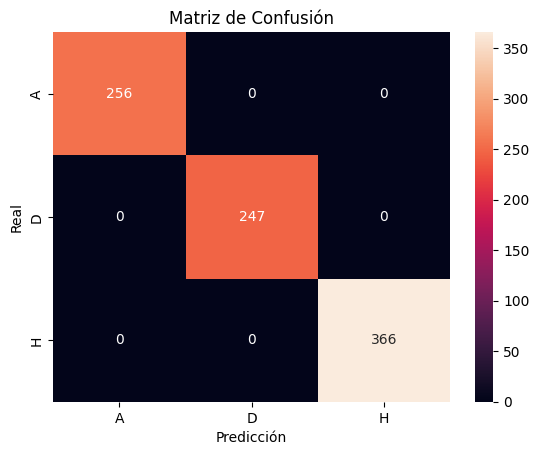

In [ ]:
#Visualización de matriz de confusión
#Dibuja un mapa de calor para visualizar dónde el modelo acierta y dónde se equivoca.
print(classification_report(y_test, y_pred, target_names=le.classes_))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()


In [ ]:
# ================================
# Función mejorada para predecir partidos de la Liga MX
# ================================
def predecir_partido(equipo_local, equipo_visitante, df, modelo, label_encoder):
    # Lista de equipos únicos
    equipos_disponibles = sorted(set(df['Equipo_Local']).union(df['Equipo_Visitante']))

    # Validaciones
    if equipo_local not in equipos_disponibles:
        return f"❌ El equipo local '{equipo_local}' no existe en el dataset."
    if equipo_visitante not in equipos_disponibles:
        return f"❌ El equipo visitante '{equipo_visitante}' no existe en el dataset."
    if equipo_local == equipo_visitante:
        return "⚠️ Un equipo no puede jugar contra sí mismo."

    # Calculate goal difference based on historical average for the teams
    avg_home_goals = df[df['Equipo_Local'] == equipo_local]['Goles_Local'].mean()
    avg_away_goals = df[df['Equipo_Visitante'] == equipo_visitante]['Goles_Visitante'].mean()
    diferencia_goles_pred = avg_home_goals - avg_away_goals


    # Prepare input data
    datos_input = pd.DataFrame({'Diferencia_Goles': [diferencia_goles_pred]})

    # Prediction
    prediccion_encoded = int(modelo.predict(datos_input)[0])
    probabilidades = modelo.predict_proba(datos_input)[0]

    # Mapeo de etiquetas
    # Use the fitted label_encoder to get the class names
    mapeo_resultados = {i: label for i, label in enumerate(label_encoder.classes_)}


    # Diccionario de probabilidades legible
    prob_dict = {
        mapeo_resultados[i]: round(float(probabilidades[i]), 2)
        for i in range(len(probabilidades))
    }

    return {
        'Resultado probable': mapeo_resultados[prediccion_encoded],
        'Probabilidades': prob_dict
    }

# ================================
# Uso interactivo
# ================================

equipos_disponibles = sorted(set(df['Equipo_Local']).union(df['Equipo_Visitante']))
print("=== Equipos disponibles en el dataset ===")
for i, equipo in enumerate(equipos_disponibles, 1):
    print(f"{i}. {equipo}")


print("=== Predicción de partido Liga MX ===")
equipo_local = input("Ingrese el nombre del equipo local: ").strip()
equipo_visitante = input("Ingrese el nombre del equipo visitante: ").strip()

# Pass the label_encoder used for encoding the target variable 'Resultado'
resultado = predecir_partido(equipo_local, equipo_visitante, df, modelo, le)
print("\n", resultado)

=== Equipos disponibles en el dataset ===
1. América
2. Atlante
3. Atlas
4. Atlético de San Luis
5. Chiapas
6. Chivas
7. Cruz Azul
8. Dorados de Sinaloa
9. Juarez
10. Leones Negros
11. León
12. Lobos BUAP
13. Mazatlan FC
14. Monarcas
15. Monterrey
16. Necaxa
17. Pachuca
18. Puebla
19. Pumas
20. Queretaro
21. Santos Laguna
22. Tigres
23. Tijuana
24. Toluca
25. Veracruz
=== Predicción de partido Liga MX ===
Ingrese el nombre del equipo local: Juarez
Ingrese el nombre del equipo visitante: Toluca

 {'Resultado probable': 'D', 'Probabilidades': {'A': 0.01, 'D': 0.98, 'H': 0.01}}
